In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from scipy.sparse import spdiags


Theoretical prediction:
  Amplitude per step |g|      = 0.99968423
  Final amplitude ratio     A/A0 = 0.2062
  Per-step phase    = -0.050269 rad
  Per-step phase exact y_ex = -0.050265 rad
  Total phase error y = -0.01985 rad
  Shift = -0.00316 (fraction -0.32% of wavelength)

Numerical measurements:
  Measured amp ratio A/A0 = 0.2061
  Crest shift Δx = +0.00000



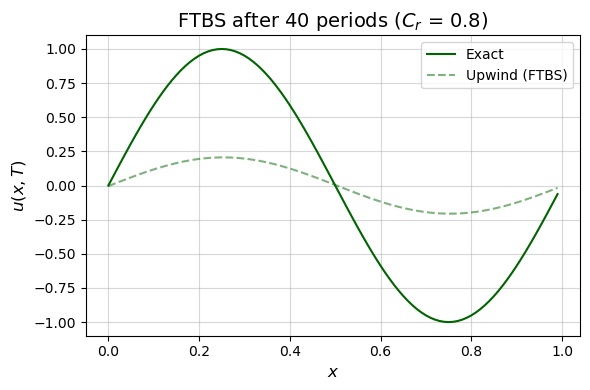

In [ ]:
# Initial Condition
def eta(x):
    return np.sin(2*np.pi*x)

#  Parameters 
a = 0.5 # advection speed
Cr = 0.8   # Courant number
A, B = 0, 1 # domain length (1 wavelength)
L = B - A
k = 2*np.pi/L # wave number (2π)

# Spatial mesh
ppw = 100   # points per wavelength
N = ppw # grid size
dx = (B-A)/N
x = np.linspace(0, L - dx, N)

# Temporal mesh
T_period = L / a            # time for 1 wave period
n_periods = 40              # simulate 40 periods
T_final = n_periods*T_period

# Time stepping
dt = Cr * dx / a
n_steps = int(np.round(T_final / dt))
dt = T_final / n_steps      # amount of time steps we perform
# C = a * dt / dx             # adjusted CFL

# Initial condition and solution
u0 = eta(x)
u = u0.copy()

# Amplification factor g(theta)
theta = k*dx
g = 1 - Cr * (1 - np.exp(-1j*theta))

# Theoretical prediciton
amp_step = np.abs(g)
phase_step = np.angle(g)
amp_total = amp_step ** n_steps
phase_total = phase_step * n_steps
exact_phase = -Cr * theta * n_steps
phase_error = phase_total - exact_phase
shift = phase_error / k
shift_fraction = shift / L

print("Theoretical prediction:")
print(f"  Amplitude per step |g|      = {amp_step:.8f}")
print(f"  Final amplitude ratio     A/A0 = {amp_total:.4f}")
print(f"  Per-step phase    = {phase_step:+.6f} rad")
print(f"  Per-step phase exact y_ex = {-Cr*theta:+.6f} rad")
print(f"  Total phase error y = {phase_error:+.5f} rad")
print(f"  Shift = {shift:+.5f} (fraction {shift_fraction:+.2%} of wavelength)\n")

# FTBS time stepping
def ftbs_step(u, Cr):
    return u - Cr * (u - np.roll(u, 1))

# Update the solution at each time step
for n in range(n_steps):
    u = ftbs_step(u, Cr)

u_exact = eta((x - a * T_final) % 1.0)

# Measurements
A_num = 0.5 * (u.max() - u.min())
A_ratio = A_num / 1.0

idx_max_u = np.argmax(u)
idx_max_exact = np.argmax(u_exact)
x_shift = (x[idx_max_u] - x[idx_max_exact]) % 1.0
x_shift = x_shift if x_shift < 0.5 else x_shift - 1.0

print("Numerical measurements:")
print(f"  Measured amp ratio A/A0 = {A_ratio:.4f}")
print(f"  Crest shift Δx = {x_shift:+.5f}\n")

# ---- Plot ----
plt.figure(figsize=(6,4))
plt.plot(x, u_exact, label='Exact', color='darkgreen')
plt.plot(x, u, '--', label='Upwind (FTBS)', color='darkgreen', alpha=0.5)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$u(x,T)$', fontsize=12)
plt.title(f'FTBS after {n_periods} periods ($C_{{r}}$ = {Cr})', fontsize=14)
plt.grid(True,alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
-0.01985*180/np.pi

-1.137321223334684

In [44]:
print(g)
print(np.abs(g))
phase_step/(-Cr*theta)

(0.9984213827426173-0.0502324156234507j)
0.9996842266921324


1.0000789711747287

In [22]:
theta
C
g.imag
g.real
g
(np.arctan(g.imag/g.real)/(-C*theta))

1.0000789711747287